# PHREEQC check for Michael

In [1]:
%load_ext autoreload
%autoreload 2

In [122]:
from inorg_b import phreeqpy_fns_mh as ph
from inorg_b import load
import phreeqpy.iphreeqc.phreeqc_dll as phreeqc_mod
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
dat = load.raw_data('inorganic_B_data.csv')

In [88]:
input_string = ph.input_str(temp=25, pH=8.25, pe=4, units='mmol/L', B=0.4319, DIC=2.393, Ca=3.851, Mg=0, Na=450, K=0, Cl=460, density=1)

In [239]:
input_string = """SOLUTION 1
        temp      2.500e+01
        pH        8.250e+00
        pe        4.000e+00
        redox     pe
        density   1 calculate
        units     mmol/L
        Cl        4.600000e+02
        Na        4.500000e+02
        Mg        0.000000e+00
        B         4.319000e-01
        Ca        3.851000e+00
        C         2.393000e+00
        K         0.000000e+00
        S(6)      0.000000e+00
        water    1 # kg
    SELECTED_OUTPUT
        ph
        temperature
        alkalinity
        ionic_strength
        totals Cl Na Mg K B Ca C S(6)
        molalities OH- H+
        molalities H3BO3 H2BO3- NaH2BO3 CaH2BO3+ H5(BO3)2- H8(BO3)3-  # boron
        molalities HCO3- NaHCO3 NaCO3- CO3-2 H2CO3 CaCO3 CaHCO3+  # carbon
        molalities B(OH)4- B(OH)3 CaB(OH)4+ B3O3(OH)4- B4O5(OH)4-2  # boron
        molalities HCO3- CO3-2 CO2  # carbon
        si Calcite Aragonite
    END
# """

dbase_path="/home/oscar/iphreeqc-3.5.0-14000/database/pitzer.dat"
phreeq_path='/usr/local/lib/libiphreeqc.so'

In [240]:
4.368 / 4.319

1.0113452188006484

In [241]:
phreeqc = phreeqc_mod.IPhreeqc(phreeq_path)
phreeqc.load_database(dbase_path)
phreeqc.set_output_file_on()
phreeqc.run_string(input_string)
out = phreeqc.get_selected_output_array()

In [215]:
4.319 / 0.99704

4.331822193693332

In [216]:
4.439 / 4.319

1.02778420930771

In [217]:
phreeqc.get_error_string()

''

In [218]:
pd.Series(out[1], out[0])

sim                                 1
state                          i_soln
soln                                1
dist_x                            -99
time                              -99
step                              -99
pH                               8.25
pe                                  4
temp(C)                            25
Alk(eq/kgw)                0.00254294
mu                           0.464061
Cl(mol/kgw)                      0.46
Na(mol/kgw)                      0.45
Mg(mol/kgw)                         0
K(mol/kgw)                          0
B(mol/kgw)                  0.0004319
Ca(mol/kgw)                  0.003851
C(mol/kgw)                   0.002393
S(6)(mol/kgw)                       0
m_OH-(mol/kgw)            2.86621e-06
m_H+(mol/kgw)             6.88257e-09
m_H3BO3(mol/kgw)                    0
m_H2BO3-(mol/kgw)                   0
m_NaH2BO3(mol/kgw)                  0
m_CaH2BO3+(mol/kgw)                 0
m_H5(BO3)2-(mol/kgw)                0
m_H8(BO3)3-(

In [45]:
# print(inp)

In [43]:
# ph.run_phreeqc(inp, )

In [162]:
ph.calc_cb(temp=25, pH=8.25, units='mmol/L', B=0.4319, DIC=2.393, Ca=3.851, Mg=0, Na=450, K=0, Cl=460)

C             0.002459
CO2           0.000019
HCO3          0.002344
CO3           0.000096
B             0.000444
BOH3          0.000368
BOH4          0.000076
BOH4_free     0.000073
pH            8.250000
temp         25.000000
alk           0.002615
SIc           0.633752
SIa           0.351777
ion_str       0.476920
Ca            0.003958
Na            0.462468
Cl            0.472745
Mg            0.000000
K             0.000000
SO4           0.000000
dtype: float64

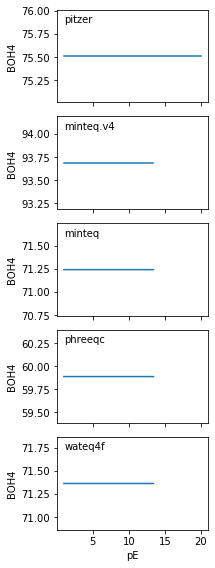

In [161]:
fig, axs = plt.subplots(5, 1, figsize=[3, 8], sharex=True)

species = 'BOH4'
dbases = ['pitzer', 'minteq.v4', 'minteq', 'phreeqc', 'wateq4f']
pE = np.linspace(1, 20)

for dbase, ax in zip(dbases, axs):
    out = np.full(pE.shape, np.nan)
    for i, pe in enumerate(pE):
        try:
            out[i] = ph.calc_cb(temp=25, pH=8.25, pe=pe, units='mmol/L', B=0.4319, DIC=2.393, Ca=3.851, Mg=0, Na=450, K=0, Cl=460, dbase=dbase)[species] * 1e6
        except:
            continue
    
    ax.plot(pE, out)
    ax.set_ylabel(species)
    ax.set_ylim(out[0] - 0.5, out[0] + 0.5)
    ax.text(.05, .95, dbase, transform=ax.transAxes, ha='left', va='top')

axs[-1].set_xlabel('pE')
fig.tight_layout()

Text(0.5, 1.0, 'minteq')

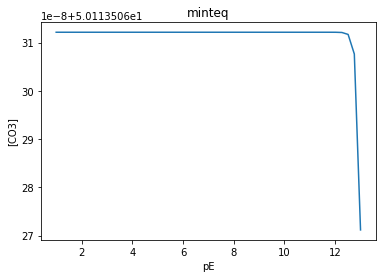

In [151]:
plt.plot(pE, out)
plt.xlabel('pE')
plt.ylabel('[CO3]')
plt.title(dbase)

In [222]:
dat = load.processed('inorganic_B_data.csv', summ=False)

In [223]:
dat.Solution

,,Experiment,Temp (°C),[B] (M),[Ca] (M),[Cl] (M),[DIC] (M),[Mg] (M),[Na] (M),d11B (permil vs NIST951),d11B_2std (permil vs NIST951),ionstr,pH (NBS),d11B_eprop (permil vs NIST951)
CaB-10,Noireaux,Aragonite,25,0.016100,0.004070,0.15,0.00583,0.025,0.10,-0.80,0.40,0.18,7.60,-0.8+/-0.4
CaB-111,Noireaux,Calcite,25,0.015200,0.000820,0.10,0.01300,0.000,0.10,-0.80,0.40,0.10,7.99,-0.8+/-0.4
CaB-12,Noireaux,Calcite,25,0.009300,0.001720,0.10,0.00148,0.000,0.10,-0.80,0.40,0.10,8.34,-0.8+/-0.4
CaB-19,Noireaux,Aragonite,25,0.015000,0.002300,0.15,0.00316,0.025,0.10,-0.80,0.40,0.18,8.44,-0.8+/-0.4
CaB-26,Noireaux,Aragonite,25,0.004380,0.001490,0.15,0.00274,0.025,0.10,-0.80,0.40,0.18,8.54,-0.8+/-0.4
CaB-30,Noireaux,Calcite,25,0.004400,0.000559,0.10,0.00209,0.000,0.10,-0.80,0.40,0.10,8.55,-0.8+/-0.4
CaB-38(s),Noireaux,Calcite,25,0.017000,0.000184,0.10,0.00316,0.000,0.10,-0.80,0.40,0.10,8.79,-0.8+/-0.4
CaB-39(s),Noireaux,Calcite,25,0.020300,0.001290,0.10,0.00164,0.000,0.10,-0.80,0.40,0.10,8.29,-0.8+/-0.4
CaB-40,Noireaux,Calcite,25,0.018500,0.002330,0.10,0.00121,0.000,0.10,-0.80,0.40,0.10,8.23,-0.8+/-0.4
CaB-45(s),Noireaux,Calcite,25,0.015900,0.000244,0.20,0.00407,0.000,0.20,-0.80,0.40,0.20,8.72,-0.8+/-0.4


In [199]:
dat.pitzer.columns

Index(['Alk(eq/kgw)', 'B', 'C', 'Ca', 'Cl', 'K', 'Mg', 'Na', 'S(6)', 'dist_x',
       'm_B(OH)3', 'm_B(OH)4-', 'm_B3O3(OH)4-', 'm_B4O5(OH)4-2', 'm_CO2',
       'm_CO3-2', 'm_CaB(OH)4+', 'm_CaCO3', 'm_CaH2BO3+', 'm_CaHCO3+', 'm_H+',
       'm_H2BO3-', 'm_H2CO3', 'm_H3BO3', 'm_H5(BO3)2-', 'm_H8(BO3)3-',
       'm_HCO3-', 'm_NaCO3-', 'm_NaH2BO3', 'm_NaHCO3', 'm_OH-', 'mu', 'pH',
       'pe', 'si_Aragonite', 'si_Calcite', 'sim', 'soln', 'state', 'step',
       'temp(C)', 'time'],
      dtype='object', name='Experiment')

In [200]:
dat.to_csv('inorganic_B_full.csv')

In [225]:
dat.loc['Exp. 8C', 'Solution']

,Experiment,Temp (°C),[B] (M),[Ca] (M),[Cl] (M),[DIC] (M),[Mg] (M),[Na] (M),d11B (permil vs NIST951),d11B_2std (permil vs NIST951),ionstr,pH (NBS),d11B_eprop (permil vs NIST951)
Uchikawa,Calcite,25,0.000432,0.00385,0.46,0.00239,0.0,0.45,-12.19,0.32,0.46,8.25,-12.19+/-0.32


In [226]:
ph.calc_cb(temp=25, pH=8.25, units='mol/L', B=0.0004319, DIC=0.002393, Ca=0.003851, Mg=0, Na=0.450, K=0, Cl=0.460, summ=False)

sim                                 1
state                          i_soln
soln                                1
dist_x                            -99
time                              -99
step                              -99
pH                               8.25
pe                                  4
temp(C)                            25
Alk(eq/kgw)                0.00257249
mu                           0.469324
Cl(mol/kgw)                  0.465216
Na(mol/kgw)                  0.455103
Mg(mol/kgw)                         0
K(mol/kgw)                          0
B(mol/kgw)                0.000436798
Ca(mol/kgw)                0.00389467
C(mol/kgw)                 0.00242014
S(6)(mol/kgw)                       0
m_OH-(mol/kgw)            2.87087e-06
m_H+(mol/kgw)             6.87535e-09
m_H3BO3(mol/kgw)                    0
m_H2BO3-(mol/kgw)                   0
m_NaH2BO3(mol/kgw)                  0
m_CaH2BO3+(mol/kgw)                 0
m_H5(BO3)2-(mol/kgw)                0
m_H8(BO3)3-(

In [211]:
ph.calc_cb_rows(dat.loc['Exp. 8C', 'Solution'], summ=False)

,,Alk(eq/kgw),B(mol/kgw),C(mol/kgw),Ca(mol/kgw),Cl(mol/kgw),K(mol/kgw),Mg(mol/kgw),Na(mol/kgw),S(6)(mol/kgw),dist_x,...,pH,pe,si_Aragonite,si_Calcite,sim,soln,state,step,temp(C),time
Uchikawa,Calcite,0.00261201,0.000443969,0.00245622,0.00395667,0.472745,0,0,0.462467,0,-99,...,8.25,4,0.351119,0.633094,1,1,i_soln,-99,25,-99


In [212]:
dat.loc['Exp. 8C', ('pitzer', ['m_CO2'])]


,,pitzer
,Experiment,m_CO2
Uchikawa,Calcite,1.88706e-05
